# Moving Averages (MA)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the input files
cabot = pd.read_excel("./Data/CABOT.xls", sheet_name = "Data")[["Year", "Revenue"]]
cabot.head()

,Year,Revenue
0,1981,1622.8
1,1982,1587.7
2,1983,1558.0
3,1984,1752.5
4,1985,1407.5


Text(0.5, 1.0, 'Cabot Corporation Revenue')

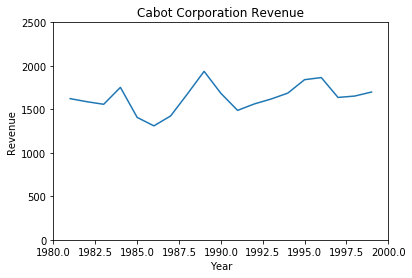

In [23]:
# Plot the Cabot Corp. Revenue
sns.lineplot(x = "Year", y = "Revenue", data = cabot)
plt.ylim(0,2500)
plt.xlim(1980,2000)
plt.title("Cabot Corporation Revenue")

In [35]:
# Get the Moving Avarage with L = 3
ma3 = cabot.rolling(3, center = True).mean().round(2)
ma3 = ma3.rename(columns = {"Revenue":"MA_3"})
ma3

,Year,MA_3
0,NaN,NaN
1,1982.0,1589.50
2,1983.0,1632.73
3,1984.0,1572.67
4,1985.0,1489.97
5,1986.0,1380.47
6,1987.0,1470.17
7,1988.0,1679.17
8,1989.0,1766.07
9,1990.0,1703.20


In [36]:
# Get the Moving Avarage with L = 7
ma7 = cabot.rolling(7, center = True).mean().round(2)
ma7 = ma7.rename(columns = {"Revenue":"MA_7"})
ma7

,Year,MA_7
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,1984.0,1523.20
4,1985.0,1530.89
5,1986.0,1580.77
6,1987.0,1598.87
7,1988.0,1561.09
8,1989.0,1583.19
9,1990.0,1627.27


In [51]:
# Plot the Moving Averages along with actual series
ma = pd.merge(left = ma3, right = ma7, how = "outer")
ma = ma[ma.Year.notnull()]
ma = pd.merge(left = cabot, right = ma, how = "left")
ma

,Year,Revenue,MA_3,MA_7
0,1981,1622.8,NaN,NaN
1,1982,1587.7,1589.50,NaN
2,1983,1558.0,1632.73,NaN
3,1984,1752.5,1572.67,1523.20
4,1985,1407.5,1489.97,1530.89
5,1986,1309.9,1380.47,1580.77
6,1987,1424.0,1470.17,1598.87
7,1988,1676.6,1679.17,1561.09
8,1989,1936.9,1766.07,1583.19
9,1990,1684.7,1703.20,1627.27


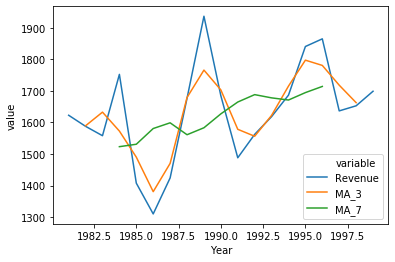

In [53]:
sns.lineplot(x = 'Year', y = 'value', hue='variable', 
             data=pd.melt(ma, ['Year']))